In [ ]:
conda install -c anaconda azure

# Aprendizagem Automática Avançada
## TP4
João Romão - 55760,
Pedro França - 55848

In [1]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics

### 1. Creating the *XOR* dataset

In order to solve the different problems in the exercise, we created a dataset with binary inputs resulting in the XOR output values. As asked in the guidelines, we created 2 versions for the input: one with binary values "0" and "1" and the other one with "-1" and "1" values. For the output, only one array was created, with "0" and "1".

In [2]:
xor_in = np.array([
         [0,0],
         [0,1],
         [1,0],
         [1,1]], 'float32')

xor_in_alt = np.array([
         [-1,-1],
         [-1,1],
         [1,-1],
         [1,1]], 'float32')

xor_out = np.array([[0], [1], [1], [0]], 'float32')

### 2. MLP architectures

As asked in the guidelines, we created two architectures for the MLP, so we could use them to learn the XOR problem in the four different situations. After establishing each architechture, we display the model summaries and plot their structure, to confirm that they are equivalent to the structures presented on the TP1 exercise. The models' activation function and momentum will be assigned according to each problem.

#### 2.1. MLP with 2 inputs, 2 hidden neurons and 1 output neuron with complete forward connections

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


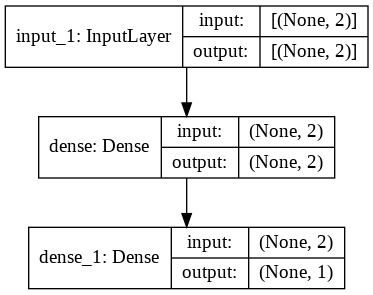

In [3]:
inp = Input(shape=(2,))
hidden = Dense(2,)(inp)
out = Dense(1,)(hidden)
model = Model(inputs=inp, outputs=out)

model.summary()
plot_model(model,show_shapes=True)

#### 2.2. MLP with 2 inputs, 1 hidden neuron, 1 output neuron and shortcut connections (same configuration as in 1st class)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            3           input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3)            0           input_2[0][0]                    
                                                                 dense_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1)            4           concatenate[0][0]          

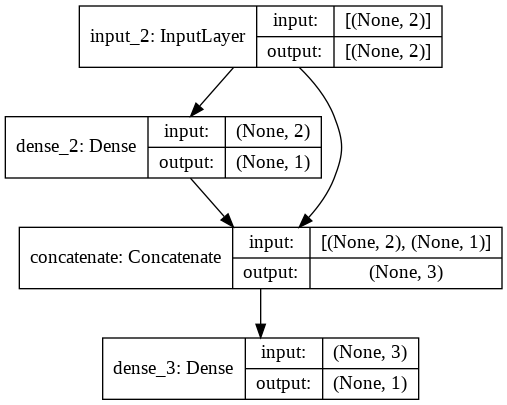

In [4]:
inp = Input(shape=(2,))
hidden = Dense(1,)(inp)
concat = concatenate([inp, hidden])
out = Dense(1,)(concat)
model = Model(inputs=inp, outputs=out)

model.summary()
plot_model(model,show_shapes=True)

#### 2.3. Defining functions for the models



To complete the assignment, we need to run these 2 architectures changing some model parameters as asked. Since each trained model can have a different seed, this means that the model trained with the same data and same parameters can obtain different trained results, since the initial weights will also be different. To minimize this error on our final analysis, we will be running each model 5 times and save the accuracy and final loss of each run. For this purpose, we will be creating two functions, MLP_1 and MLP_2, corresponding to the first and second architechtures, respectively, to define the parameters and train the models. These functions will also return the mean and standard deviation of the accuracy and loss obtained for the 5 runs.


Besides this, to train the models we needed to set a number of epochs (number of passes, forward and backward, of the entire training dataset the machine learning algorithm has completed) and batch sizes (number of samples that will be propagated through the network). Knowing that we have a very small dataset, we reduced the batch size to 1, meaning each example from our input will be used one at a time to train the model. Since we have 4 data examples, we will have 4 * 1 iterations for each epoch. By defining our epochs to 5000, we will have 20000 iterations to train only 1 model (4 * 5000 = 20000).

In [5]:
def MLP_1(activation, momentum, input, limit):
  i = 0
  loss = []
  acc = []

  while i < limit:
    print('MLP_1 training #' + str(i+1))
    inp = Input(shape=(2,))
    hidden = Dense(2,activation=activation)(inp)
    out = Dense(1, activation=activation)(hidden)
    model = Model(inputs=inp, outputs=out)

    #compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1,momentum=momentum), metrics=['accuracy'])
    model.fit(input, xor_out, epochs=5000, batch_size=1, verbose=0)
    print((model.predict(input)>0.5).astype("int32"))
    
    z = model.evaluate(input, xor_out)
    loss.append(z[0])
    acc.append(z[1])

    i = i + 1

  return(statistics.mean(loss), statistics.stdev(loss), statistics.mean(acc), statistics.stdev(acc))

In [6]:
def MLP_2(activation, momentum, input, limit):
  i = 0
  loss = []
  acc = []

  while i < limit:
    print('MLP_2 training #' + str(i+1))
    inp = Input(shape=(2,))
    hidden = Dense(1,activation=activation)(inp)
    concat = concatenate([inp, hidden])
    out = Dense(1, activation=activation)(concat)
    model = Model(inputs=inp, outputs=out)

    #compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1,momentum=momentum), metrics=['accuracy'])
    model.fit(input, xor_out, epochs=5000, batch_size=1, verbose=0)
    print((model.predict(input)>0.5).astype("int32"))
    
    z = model.evaluate(input, xor_out)
    loss.append(z[0])
    acc.append(z[1])

    i = i + 1

  return(statistics.mean(loss), statistics.stdev(loss), statistics.mean(acc), statistics.stdev(acc))

We will also create separate empty lists to store the mean and standard deviation for the accuracy and loss of each model, after the five runs. These will be later used to create a visual representation of the results.

In [7]:
# lists for the first model
m1_loss_mean = []
m1_loss_stdev = []
m1_acc_mean = []
m1_acc_stdev = []

# lists for the second model
m2_loss_mean = []
m2_loss_stdev = []
m2_acc_mean = []
m2_acc_stdev = []

### 3. Training the 2 architecture models

In this section we will use the functions we constructed previously to define the parameters of each MLP, and store the outputs in the lists we created. We will skip the interpretation of the printed predictions for now, but we will still present them for later inspection.

#### A) Hidden neurons with logistic activation function
Data set with binary values in {0, 1}
Standard backpropagation algorithm

In [8]:
a, b, c, d =  MLP_1('sigmoid',0.0,xor_in, 5)
m1_loss_mean.append(a)
m1_loss_stdev.append(b)
m1_acc_mean.append(c)
m1_acc_stdev.append(d)

MLP_1 training #1
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 123ms/step - loss: 0.0027 - accuracy: 1.0000
MLP_1 training #2
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 86ms/step - loss: 0.0035 - accuracy: 1.0000
MLP_1 training #3
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 84ms/step - loss: 0.0026 - accuracy: 1.0000
MLP_1 training #4
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 84ms/step - loss: 0.0023 - accuracy: 1.0000
MLP_1 training #5
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 86ms/step - loss: 0.2500 - accuracy: 0.5000


In [9]:
a, b, c, d = MLP_2('sigmoid',0.0,xor_in, 5)
m2_loss_mean.append(a)
m2_loss_stdev.append(b)
m2_acc_mean.append(c)
m2_acc_stdev.append(d)

MLP_2 training #1
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 89ms/step - loss: 0.0060 - accuracy: 1.0000
MLP_2 training #2
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 92ms/step - loss: 0.0063 - accuracy: 1.0000
MLP_2 training #3
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 100ms/step - loss: 0.0078 - accuracy: 1.0000
MLP_2 training #4
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 95ms/step - loss: 0.0152 - accuracy: 1.0000
MLP_2 training #5
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 90ms/step - loss: 0.0050 - accuracy: 1.0000


#### B) Hidden neurons with hyperbolic tangent activation function
Data set with binary values in {-1, 1}
Backpropagation with momentum algorithm

In [10]:
a, b, c, d =  MLP_1('tanh',0.9,xor_in_alt, 5)
m1_loss_mean.append(a)
m1_loss_stdev.append(b)
m1_acc_mean.append(c)
m1_acc_stdev.append(d)

MLP_1 training #1
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 86ms/step - loss: 1.8760e-05 - accuracy: 1.0000
MLP_1 training #2
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 86ms/step - loss: 2.2450e-04 - accuracy: 1.0000
MLP_1 training #3
[[0]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 95ms/step - loss: 1.2655e-05 - accuracy: 1.0000
MLP_1 training #4
[[1]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_1 training #5
[[1]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 89ms/step - loss: 0.5000 - accuracy: 0.5000


In [11]:
a, b, c, d = MLP_2('tanh',0.9,xor_in_alt, 5)
m2_loss_mean.append(a)
m2_loss_stdev.append(b)
m2_acc_mean.append(c)
m2_acc_stdev.append(d)

MLP_2 training #1
[[1]
 [1]
 [1]
 [0]]
1/1 [==============================] - 0s 92ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #2
[[0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 88ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #3
[[0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 91ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #4
[[0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 96ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #5
[[0]
 [1]
 [1]
 [1]]
1/1 [==============================] - 0s 98ms/step - loss: 0.2710 - accuracy: 0.7500


#### C) Hidden neurons with relu activation function
Data set with binary values in {0, 1}
Standard backpropagation algorithm

In [12]:
a, b, c, d =  MLP_1('relu',0.0,xor_in, 5)
m1_loss_mean.append(a)
m1_loss_stdev.append(b)
m1_acc_mean.append(c)
m1_acc_stdev.append(d)

MLP_1 training #1
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #2
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 411ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #3
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 95ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #4
[[0]
 [0]
 [1]
 [0]]
1/1 [==============================] - 0s 89ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_1 training #5
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.5000 - accuracy: 0.5000


In [13]:
a, b, c, d = MLP_2('relu',0.0,xor_in, 5)
m2_loss_mean.append(a)
m2_loss_stdev.append(b)
m2_acc_mean.append(c)
m2_acc_stdev.append(d)

MLP_2 training #1
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 92ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_2 training #2
[[0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 89ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #3
[[0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 87ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #4
[[0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 94ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #5
[[0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 87ms/step - loss: 0.2500 - accuracy: 0.7500


#### D) Hidden neurons with relu activation function
Data set with binary values in {0, 1}
Backpropagation with momentum algorithm

In [14]:
a, b, c, d =  MLP_1('relu',0.9,xor_in, 5)
m1_loss_mean.append(a)
m1_loss_stdev.append(b)
m1_acc_mean.append(c)
m1_acc_stdev.append(d)

MLP_1 training #1
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 99ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #2
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #3
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 102ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #4
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 95ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_1 training #5
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 89ms/step - loss: 0.5000 - accuracy: 0.5000


In [15]:
a, b, c, d = MLP_2('relu',0.9,xor_in, 5)
m2_loss_mean.append(a)
m2_loss_stdev.append(b)
m2_acc_mean.append(c)
m2_acc_stdev.append(d)

MLP_2 training #1
[[0]
 [1]
 [0]
 [0]]
1/1 [==============================] - 0s 90ms/step - loss: 0.2500 - accuracy: 0.7500
MLP_2 training #2
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_2 training #3
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 98ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_2 training #4
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 91ms/step - loss: 0.5000 - accuracy: 0.5000
MLP_2 training #5
[[0]
 [0]
 [0]
 [0]]
1/1 [==============================] - 0s 102ms/step - loss: 0.5000 - accuracy: 0.5000


### 4. Results

### 4.1 Accuracy analysis 

The accuracy of a machine learning classification algorithm is one way to measure how often the algorithm classifies a data point correctly. Accuracy is the number of correctly predicted data points out of all the predicted data points. It can be easily calculated by dividing the number of correct predictions by the number of total predictions.

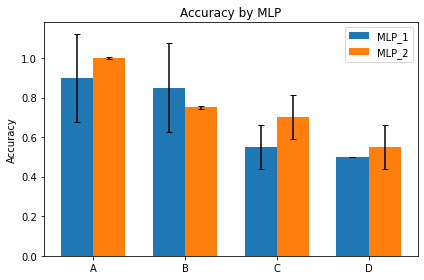

In [18]:
labels = ['A','B','C','D']

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, m1_acc_mean, width, label='MLP_1', yerr = m1_acc_stdev, capsize=3)
rects2 = ax.bar(x + width/2, m2_acc_mean, width, label='MLP_2', yerr = m2_loss_stdev, capsize=3)

# adding text
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by MLP')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

### 4.2 Loss analysis 

Loss is the penalty for a bad prediction. That is, loss is a number indicating how wrong the model's prediction was on a single example. If the model's prediction is perfect the loss is zero, otherwise the loss is greater. 

The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples. Loss is used to calculate the gradients and gradients are used to update the weights of the neural net.
In our MLP architectures we are using mean square root function to determine the loss values (sum up all the squared losses for individual examples and then divide by the number of examples).

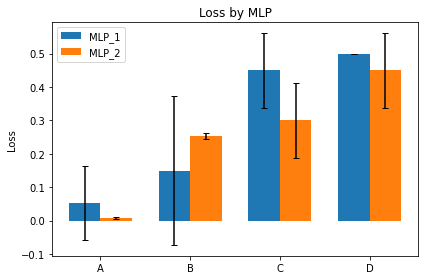

In [19]:
labels = ['A','B','C','D']

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, m1_loss_mean, width, label='MLP_1', yerr = m1_loss_stdev, capsize=3)
rects2 = ax.bar(x + width/2, m2_loss_mean, width, label='MLP_2', yerr = m2_loss_stdev, capsize=3)

# adding text
ax.set_ylabel('Loss')
ax.set_title('Loss by MLP')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

### 5. Final remarks

By inspecting the bar plots, we can identify that the MLP_2 model as defined for the A) exercise was the best learner of the XOR dataset, since it displays an average accuracy of 1, and average loss very close to 0. Furthermore, the standard deviation for both these metrics is 0, meaning the results were consistent for the 5 runs.

Overall, both models performed similarly in terms of accuracy, altough in exercise C) MLP_1 appears to have performed worse than MLP_2, displaying lower accuracy and higher loss. In the other exercises, the averages of all models appear to be in the range of the standard deviations of their counterpart. Altough this is not an accepted metric for precise comparison of the different models (statistical tests can be applied for that purpose, such as the Student's t-test), it sufficies for this quick evaluation of such a small sample. The parameters of exercises A) and B) resulted in overall better performance of both MLPs, which displayed average accuracies higher than 0.75 (meaning, on average, less than 1 error was commited when predicting the output). As for C) and D), which both used 'relu' as the activation function, the average accuracy was between 0.5 and 0.75 (on average, between 1 and 2 errors were commited by the models' prediction). Moreover, these are the only instances which allow a direct comparison of the influence of momentum in the MLP, as this parameter is absent in C) and present in D) (defined as 0.0 and 0.9, respectively). Briefly, momentum is a parameter that both speeds up learning and helps the stochastic gradient descent (SGD) not getting stuck in local minima of the loss function. This would, in theory, help SGD bypass local minima in order to reach the global loss minimum. However, the results for D) are worse than those from C), which we did not expect since the latter did not use momentum. Our hypothesis is that the momentum was too high relative to the learning rate, which did not allow for the algorithm to converge to a minimum. Furthermore, a known problem with ReLu is that large weight updates can cause the input to the activation function to be negative, which will cause its output to always be 0. We can observe this phenomenon in the printed outputs of exercises C) and D), which are mostly 0's, causing the accuracy to decrease as it will not be able to output 1's.

Lastly, since we did not use a seed and are only assessing the statistics of 5 runs, the results we present may vary for subsequent runs. Nonetheless, after having ran the code multiple times, we can say that the results currently displayed are representative of all the scenarios we observed, and so our main conclusions should be generalizable to other runs, altough the best and worst model may vary.